## Skills in Demand for the Top Roles

In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Getting in the Dataset
df = pd.read_csv('D:\Python Analysis\Python Analytics\data_jobs.csv')

# Minimal cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


### Identifying the Top Roles

In [16]:
top_roles = df['job_title_short'].value_counts()
top_roles = top_roles.index[0:3].to_list()
top_roles

['Data Analyst', 'Data Engineer', 'Data Scientist']

#### Exploding Job Roles Column 

In [17]:
df_exploded = df.explode('job_skills')
df_skill_count = df_exploded.groupby(['job_skills','job_title_short']).size().reset_index(name='count')

df_skill_count = df_skill_count.sort_values(by='count',ascending=False)
df_skill_count

,job_skills,job_title_short,count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


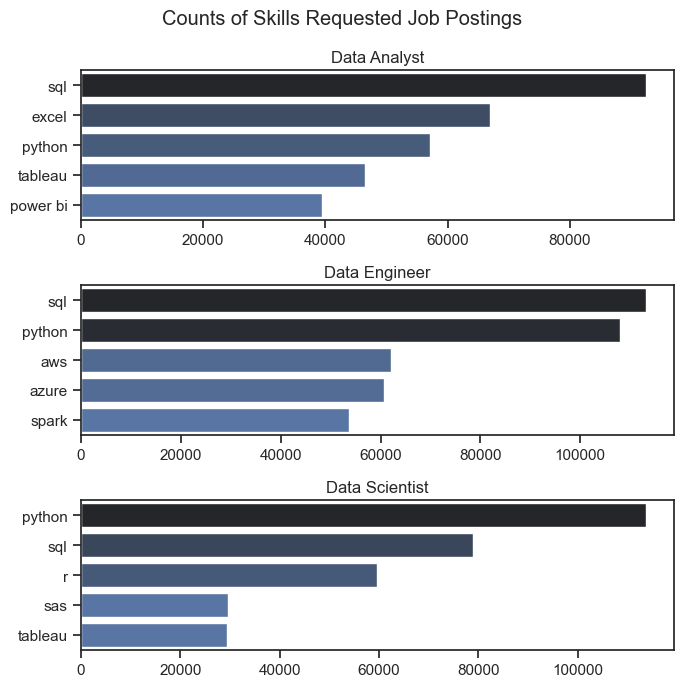

In [18]:
#df_skill_count[df_skill_count['job_title_short'] == 'Data Scientist'].head(5).plot(kind='barh',x='job_skills')

fig, ax = plt.subplots(3,1,figsize=(7,7))
sns.set_theme(style='ticks')

for i,job in enumerate(top_roles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job].head(5)
    sns.barplot(data=df_plot,x='count',y='job_skills',ax=ax[i],hue='count',palette='dark:b_r',legend=False)
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

fig.suptitle('Counts of Skills Requested Job Postings')
fig.tight_layout()

#### Getting the Overall job count for Each job title and then merging with df_skill_count

In [19]:
df_exploded = df.explode('job_skills')
df_job_count = df['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_count

,job_title_short,jobs_total
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


#### Calculating the likelihood of each skill required for each Job

In [20]:
df_skills_percent = pd.merge(df_skill_count, df_job_count, on='job_title_short', how='left')
df_skills_percent['count_percent'] = (df_skills_percent['count'] / df_skills_percent['jobs_total']) * 100
df_skills_percent

,job_skills,job_title_short,count,jobs_total,count_percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,codecommit,Business Analyst,1,49063,0.002038
2253,xamarin,Machine Learning Engineer,1,14080,0.007102
2254,mlr,Machine Learning Engineer,1,14080,0.007102


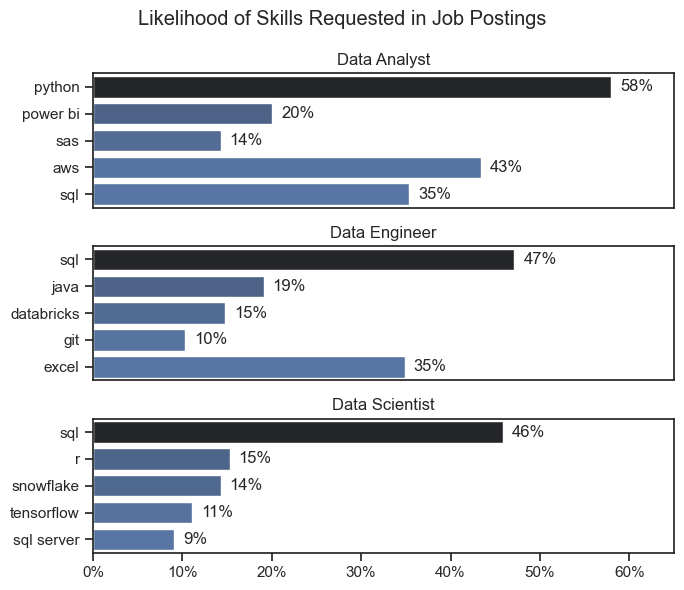

In [24]:
#df_skill_count[df_skill_count['job_title_short'] == 'Data Scientist'].head(5).plot(kind='barh',x='job_skills')

fig, ax = plt.subplots(3,1,figsize=(7,6))
sns.set_theme(style='ticks')

for i,job in enumerate(top_roles):
    df_plot = df_skills_percent.loc[df_skill_count['job_title_short'] == job].head(5)
    sns.barplot(data=df_plot,x='count_percent',y='job_skills',ax=ax[i],hue='count',palette='dark:b_r',legend=False)
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 65)

    # remove the x-axis tick labels for better readability
    if i != len(top_roles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['count_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

from matplotlib.ticker import PercentFormatter
ax[2].xaxis.set_major_formatter(PercentFormatter(decimals=0))

fig.suptitle('Likelihood of Skills Requested in Job Postings')
fig.tight_layout()
plt.show()